In [3]:
import tdb
import pandas as pd
import seaborn as sb

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
data = tdb.load_tdb("../test_files/databases/hprc_105.tdb/")

In [6]:
s = data['sample']['HG002']#list(data['sample'].keys())

In [36]:
l = data['locus']
xy_loci = l[l['chrom'].isin(["chrX", "chrY"])]['LocusID'].values

In [176]:
# This is allele and methylation. What if I look at just methylation status by locus
all_methyl_cnts = []
for sample in data['sample']:
    s = data['sample'][sample]
    s = s[(s['spanning_reads'] >= 10) & ~s['LocusID'].isin(xy_loci)]
    if s['average_methylation'].isna().sum() == len(s):
        continue
    all_methyl_cnts.append((s.groupby(['LocusID'])
                            [['average_methylation']]
                            .mean()
                            .dropna()
                            .rename(columns={'average_methylation':sample}))
                          )
pca_methyl_locus = pd.concat(all_methyl_cnts, axis=1)

Text(0.5, 1.0, 'Methylation PCA')

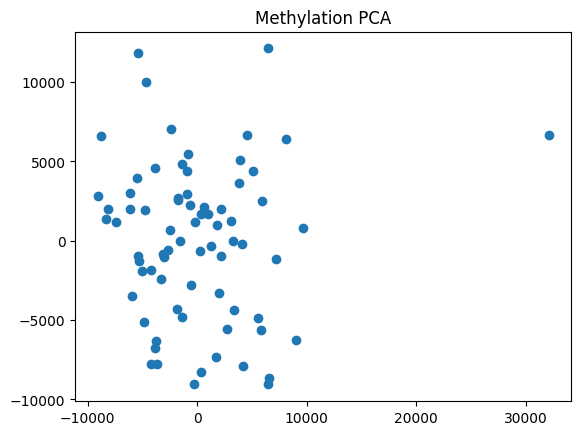

In [177]:
pca = PCA(n_components=5)
filled = pca_methyl_locus.fillna(0).values

X_r = pca.fit(filled.T).transform(filled.T)

plt.figure()
plt.scatter(X_r[:, 0], X_r[:, 1])
plt.title("Methylation PCA")

<Axes: xlabel='PC1', ylabel='PC2'>

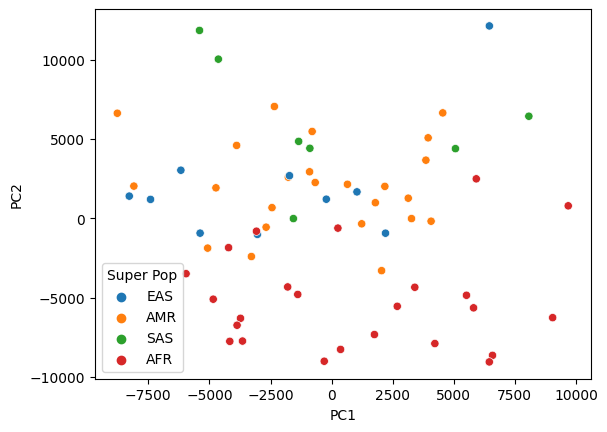

In [184]:
meta = pd.read_csv("/Users/english/Downloads/igsr_samples.tsv", sep='\t')
slookup = dict(zip(x["Sample name"], meta["Superpopulation code"]))

m_X = pd.DataFrame(X_r, columns=["PC1", "PC2", "PC3", "PC4", "PC5"])
m_X['sample'] = pca_methyl_locus.columns
m_X['Super Pop'] = m_X['sample'].map(slookup)

sb.scatterplot(data=m_X, x="PC1", y="PC2", hue="Super Pop")

In [197]:
pca.explained_variance_ratio_

array([0.03710651, 0.02555358, 0.01988029, 0.01832718, 0.01654268])

Text(0.5, 1.0, 'Methylation PCA')

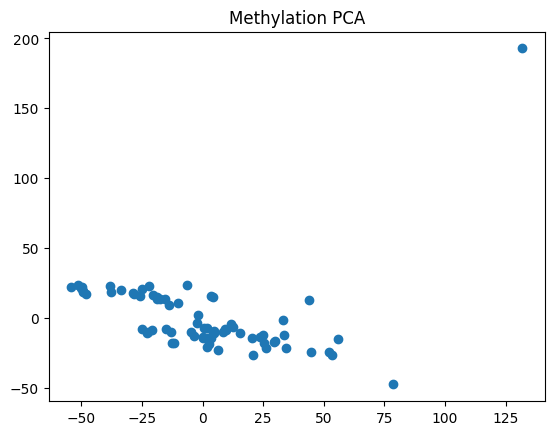

In [198]:
pca = PCA(n_components=5)
filled = (~pca_methyl_locus.isna()).values

X_r = pca.fit(filled.T).transform(filled.T)

plt.figure()
plt.scatter(X_r[:, 0], X_r[:, 1])
plt.title("Methylation PCA")

<Axes: xlabel='PC1', ylabel='PC2'>

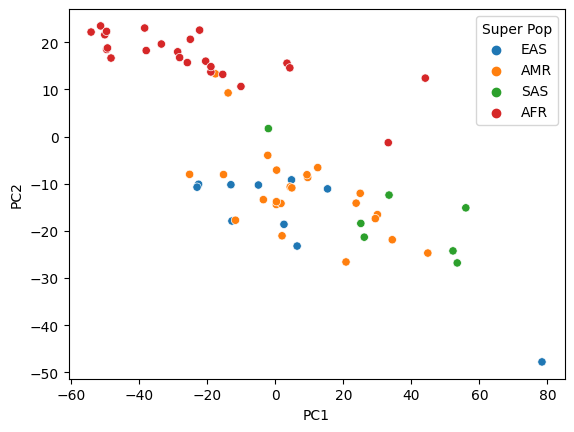

In [199]:
meta = pd.read_csv("/Users/english/Downloads/igsr_samples.tsv", sep='\t')
slookup = dict(zip(x["Sample name"], meta["Superpopulation code"]))

m_X = pd.DataFrame(X_r, columns=["PC1", "PC2", "PC3", "PC4", "PC5"])
m_X['sample'] = pca_methyl_locus.columns
m_X['Super Pop'] = m_X['sample'].map(slookup)

sb.scatterplot(data=m_X, x="PC1", y="PC2", hue="Super Pop")

In [200]:
pca.explained_variance_ratio_

array([0.03024309, 0.02304941, 0.02145551, 0.01732317, 0.01674729])

Text(0.5, 1.0, 'Methylation PCA')

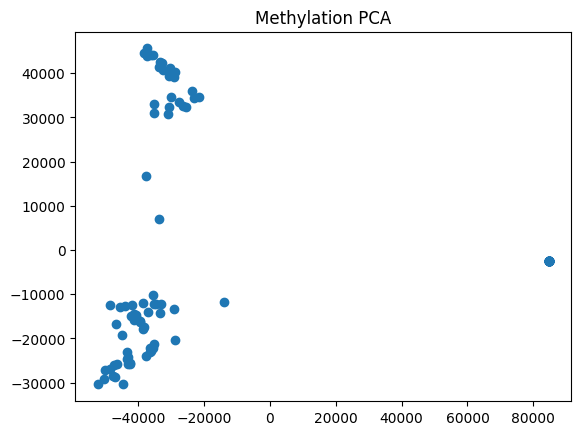

In [37]:
# This is allele and methylation. What if I look at just methylation status by locus
all_methyl_cnts = []
for sample in data['sample']:
    s = data['sample'][sample]
    s = s[(s['spanning_reads'] >= 10) & ~s['LocusID'].isin(xy_loci)]
    all_methyl_cnts.append((s.groupby(['LocusID', "allele_number"])
                            [['average_methylation']]
                            .mean()
                            .dropna()
                            .rename(columns={'average_methylation':sample}))
                          )
pca_methyl = pd.concat(all_methyl_cnts, axis=1)

pca = PCA(n_components=2)
filled = pca_methyl.fillna(0).values

X_r = pca.fit(filled.T).transform(filled.T)

plt.figure()
plt.scatter(X_r[:, 0], X_r[:, 1])
plt.title("Methylation PCA")

In [155]:

m_X

,PC1,PC2,sample
0,-46880.974243,-16761.128573,HG002
1,84663.196904,-2454.849656,HG03825
2,84663.196904,-2454.849656,HG02668
3,84663.196904,-2454.849656,HG02738
4,-43199.423112,-25794.226905,HG00609
...,...,...,...
100,-42435.146944,-25853.282647,HG01952
101,84663.196904,-2454.849656,HG01884
102,-37434.990198,45598.893131,HG03453
103,-38529.975689,-17803.671962,HG01358


<Axes: xlabel='PC1', ylabel='PC2'>

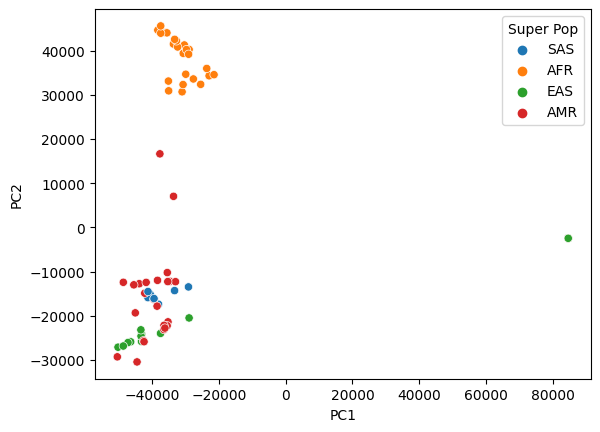

In [149]:

sex = pca_methyl.columns.map(slookup)


In [150]:
sex[X_r[:, 1] > 0].value_counts()

AFR    24
AMR     2
dtype: int64

In [151]:
sex[X_r[:, 1] < 0].value_counts()

AMR    27
SAS    24
EAS    16
AFR     4
dtype: int64

In [64]:
s2 = data['sample'][sample]

In [120]:
pca_methyl.columns[X_r[:, 1] > 0]

Index(['HG03486', 'HG03540', 'HG01109', 'HG03471', 'HG02886', 'HG02486',
       'HG02717', 'HG02723', 'HG02109', 'HG02622', 'HG02970', 'HG03579',
       'HG02615', 'HG02630', 'HG01243', 'HG02572', 'HG02145', 'HG02809',
       'HG01891', 'HG02559', 'HG03516', 'HG03098', 'HG02280', 'HG02257',
       'HG02055', 'HG02818', 'HG03453'],
      dtype='object')

In [52]:
s['LocusID'].isin(xy_loci.values).sum()

0

Text(0.5, 1.0, 'Methylation PCA')

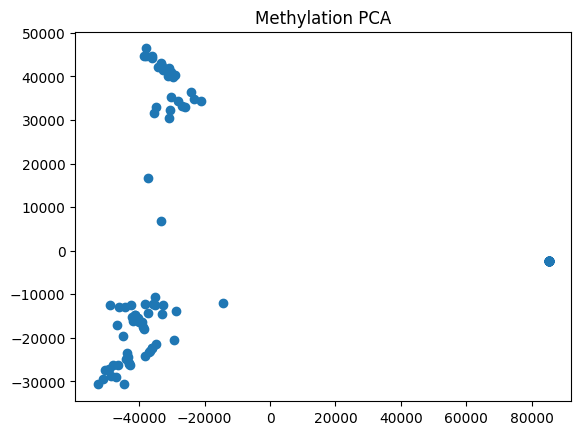

In [30]:
# With X/Y alleles. separation by sex

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True,  True,  True, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
        True,  True, False, False, False, False,  True, False, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False,  True, False, False, False,  True, False,  True,
        True, False, False, False,  True, False,  True, False, False,
       False, False, False, False,  True, False,  True, False,  True,
       False, False, False,  True, False, False])

In [32]:
pca_methyl.columns[X_r[:, 1] > 0]

Index(['HG03486', 'HG03540', 'HG01109', 'HG03471', 'HG02886', 'HG02486',
       'HG02717', 'HG02723', 'HG02109', 'HG02622', 'HG02970', 'HG03579',
       'HG02615', 'HG02630', 'HG01243', 'HG02572', 'HG02145', 'HG02809',
       'HG01891', 'HG02559', 'HG03516', 'HG03098', 'HG02280', 'HG02257',
       'HG02055', 'HG02818', 'HG03453'],
      dtype='object')

In [33]:
pca_methyl.columns[X_r[:, 1] < 0]

Index(['HG002', 'HG03825', 'HG02668', 'HG02738', 'HG00609', 'HG02293',
       'HG02027', 'HG006', 'HG02300', 'HG00738', 'HG04204', 'HG01887',
       'HG01934', 'HG03831', 'HG02132', 'HG007', 'HG04184', 'HG03804',
       'HG02080', 'HG003', 'HG01496', 'HG01993', 'HG04157', 'HG03492',
       'HG00642', 'HG02656', 'HG00514', 'HG00706', 'HG01106', 'HG00673',
       'HG00733', 'HG03669', 'HG02602', 'HG01123', 'HG00544', 'HG01255',
       'HG02148', 'HG02647', 'HG00621', 'HG04228', 'HG01928', 'HG01175',
       'HG02683', 'HG04199', 'HG00741', 'HG00423', 'HG01978', 'HG00735',
       'HG01346', 'HG01071', 'HG02523', 'HG03688', 'HG004', 'HG01433',
       'HG04187', 'HG03654', 'HG01943', 'HG01099', 'HG02083', 'HG03710',
       'HG04115', 'HG01442', 'HG04160', 'HG02074', 'HG001', 'HG00438',
       'HG01981', 'HG02698', 'HG03927', 'HG03942', 'HG02135', 'HG005',
       'HG02004', 'HG03816', 'HG01952', 'HG01884', 'HG01358', 'HG02071'],
      dtype='object')

In [76]:
import numpy as np
nans = pca_methyl.values == np.nan

In [104]:
all_nan = np.isnan(pca_methyl.values).sum(axis=0)

In [116]:
all_nan[0], len(pca_methyl

7095010

ValueError: arange: cannot compute length

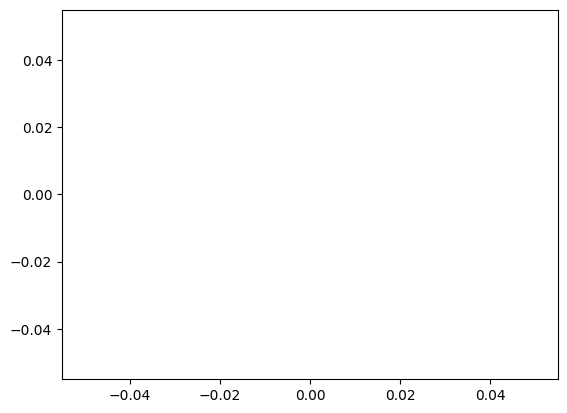

In [71]:
for i in ["HG03825", "HG02738", "HG00609"]:
    sb.histplot(pca_methyl[i], binwidth=10)
    plt.show()